# Leitura dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/soy/13/soy_prices.csv')
data.head()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
0,1,2,13,2021-06-01,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,16,2,13,2021-06-28,86.791109,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,110,2,13,2021-06-21,88.678023,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,127,2,13,2021-06-16,92.501266,97.651859,85.078293,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,135,2,13,2021-06-29,86.988890,92.104972,84.394537,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [3]:
data.shape

(745, 10)

In [4]:
df = data.copy()

In [5]:
df.head()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
0,1,2,13,2021-06-01,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,16,2,13,2021-06-28,86.791109,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,110,2,13,2021-06-21,88.678023,NaN,NaN,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,127,2,13,2021-06-16,92.501266,97.651859,85.078293,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,135,2,13,2021-06-29,86.988890,92.104972,84.394537,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [6]:
df.sort_values(by='date', inplace=True)
df = df.iloc[:-3]
df.tail()

,id,product_id,main_location_id,date,avg_price,ask,bid,created_at,main_location,updated_at
737,67613,2,13,2024-04-08,56.782795,57.494348,55.071242,2024-04-08 20:27:15,NaN,2024-04-09 14:56:59
738,67664,2,13,2024-04-09,55.983425,56.774609,54.192241,2024-04-09 20:26:54,NaN,2024-04-10 15:17:30
739,67715,2,13,2024-04-10,56.765685,57.184092,55.347278,2024-04-10 20:26:30,NaN,2024-04-11 13:08:41
740,67766,2,13,2024-04-11,56.141202,57.459138,55.823267,2024-04-11 20:27:47,NaN,2024-04-12 12:48:17
741,67817,2,13,2024-04-12,57.652010,58.777645,56.526375,2024-04-12 20:27:05,NaN,2024-04-15 12:59:55


In [7]:
df = df.groupby(['product_id', 'main_location_id', 'date']).agg({
    'id': 'last',
    'avg_price': 'mean',  # Média de avg_price
    'ask': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,  # Primeiro valor não nulo para ask
    'bid': lambda x: x.dropna().iloc[0] if not x.dropna().empty else np.nan,  # Primeiro valor não nulo para bid
    'created_at': 'first',  # Primeiro valor de created_at
    'main_location': 'first',  # Primeiro valor de main_location
    'updated_at': 'first'  # Primeiro valor de updated_at
}).reset_index()
df['ask'] = df['ask'].interpolate(limit_direction='both') # interpolando variável exógena
df['bid'] = df['bid'].interpolate(limit_direction='both') # interpolando variável exógena
df.head()

,product_id,main_location_id,date,id,avg_price,ask,bid,created_at,main_location,updated_at
0,2,13,2021-05-31,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
1,2,13,2021-06-01,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2,2,13,2021-06-02,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
3,2,13,2021-06-04,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
4,2,13,2021-06-07,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [8]:
df.shape

(733, 10)

In [9]:
df.index = df['date']
df.head()

,product_id,main_location_id,date,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,,
2021-05-31,2,13,2021-05-31,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,2,13,2021-06-01,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,2,13,2021-06-02,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-04,2,13,2021-06-04,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-07,2,13,2021-06-07,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [10]:
df.drop('date', axis=1, inplace=True)
df.head()

,product_id,main_location_id,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,
2021-05-31,2,13,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,2,13,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,2,13,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-04,2,13,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-07,2,13,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


# Análise descritiva da série temporal

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [53]:
descriptive_stats = df[["avg_price", "ask", "bid"]].describe()
descriptive_stats

,avg_price,ask,bid
count,733.000000,733.000000,733.000000
mean,77.085638,78.434108,75.878539
std,16.162238,16.687854,15.765444
min,47.529832,47.712849,46.746814
25%,57.905428,58.754577,56.999874
50%,82.789998,83.993062,81.895052
75%,88.480199,90.400136,87.300618
max,102.367779,105.316259,100.909936


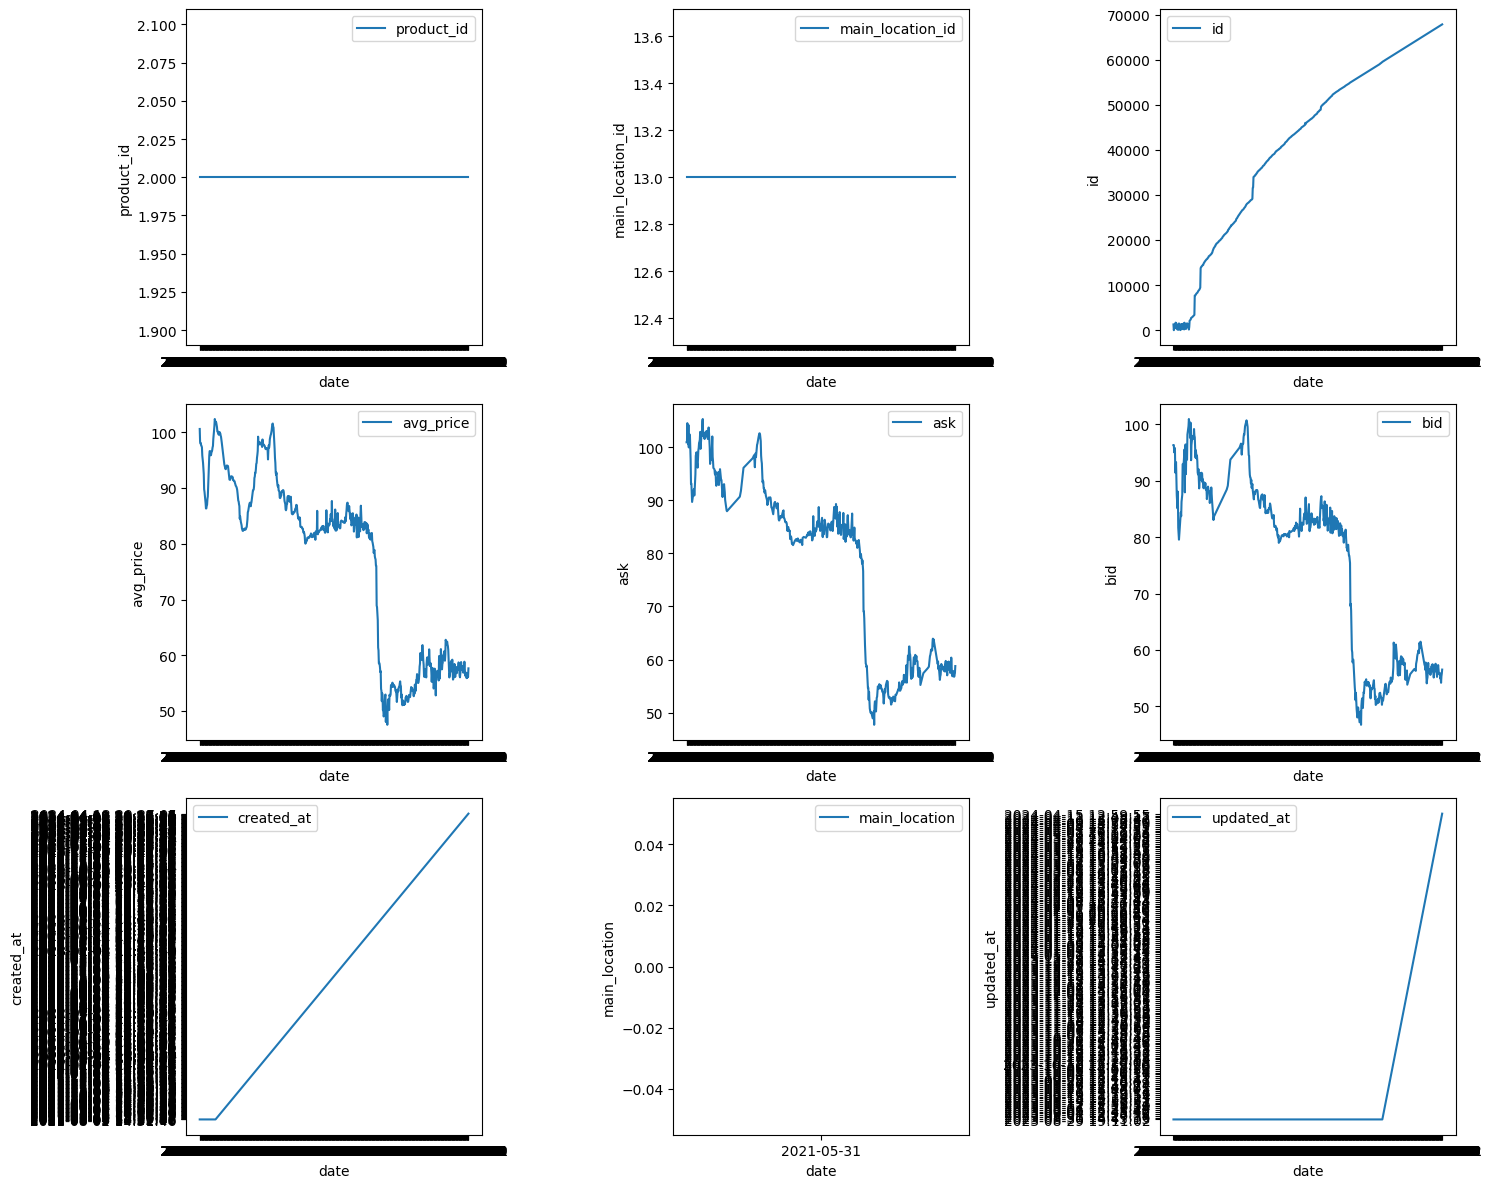

In [14]:
import math

num_columns = len(df.columns)

cols = 3  
rows = math.ceil(num_columns / cols)  

plt.figure(figsize=(cols * 5, rows * 4))

for i, column in enumerate(df.columns, 1):
    plt.subplot(rows, cols, i)
    plt.plot(df[column], label=column)
    plt.xlabel('date')
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

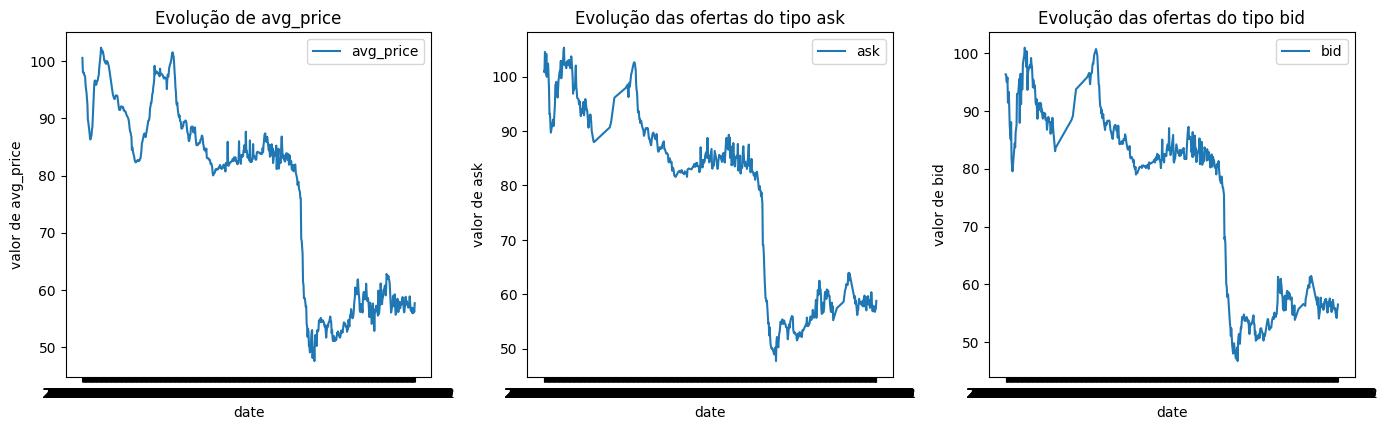

In [15]:
# Visualización de las series temporales
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(df['avg_price'], label='avg_price')
plt.title('Evolução de avg_price')
plt.xlabel('date')
plt.ylabel('valor de avg_price')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(df['ask'], label='ask')
plt.title('Evolução das ofertas do tipo ask')
plt.xlabel('date')
plt.ylabel('valor de ask')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(df['bid'], label='bid')
plt.title('Evolução das ofertas do tipo bid')
plt.xlabel('date')
plt.ylabel('valor de bid')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
selected_columns = ['avg_price', 'ask', 'bid']
correlation_matrix = df[selected_columns].corr()
correlation_matrix

,avg_price,ask,bid
avg_price,1.000000,0.996388,0.996400
ask,0.996388,1.000000,0.994042
bid,0.996400,0.994042,1.000000


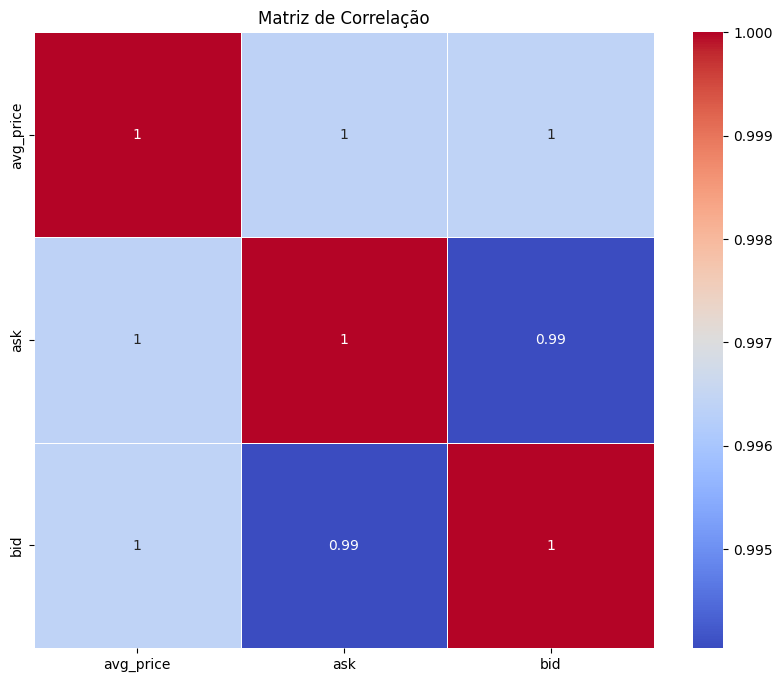

In [17]:


# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Análisis de Estacionariedad

In [18]:
from statsmodels.tsa.stattools import adfuller, kpss

In [19]:
# Augmented Dickey-Fuller Test (ADF) e Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
def stationarity_tests(timeseries, series_name):
    print(f"Resultados para test ADF {series_name}:")
    adf_test = adfuller(timeseries)
    print(f"ADF Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")
    for key, value in adf_test[4].items():
        print(f'Critical Value ({key}): {value}')
    print()



In [20]:
df.columns

Index(['product_id', 'main_location_id', 'id', 'avg_price', 'ask', 'bid',
       'created_at', 'main_location', 'updated_at'],
      dtype='object')

In [21]:
relevant_columns = ['avg_price']

df_interpolated = df[relevant_columns].copy()

for serie in relevant_columns:
    print(f"Analisando a série: {serie}")
    # Verifica se a série é constante
    if df_interpolated[serie].nunique() > 1:  # Garante que haja variabilidade na série
        stationarity_tests(df_interpolated[serie], serie)
    else:
        print(f"A série {serie} é constante e foi ignorada.")


Analisando a série: avg_price
Resultados para test ADF avg_price:
ADF Statistic: -1.0991233056719667
p-value: 0.7154213940728572
Critical Value (1%): -3.439376877165393
Critical Value (5%): -2.865523768488869
Critical Value (10%): -2.5688914082860164



# Transformação de séries não estacionárias


In [54]:
from statsmodels.tsa.stattools import adfuller

# Função para aplicar diferenciação e testar estacionariedade
def difference_and_test_stationarity(series, series_name, diff_order=1):
    differenced_series = series.diff(diff_order).dropna()

    # ADF test na série diferenciada
    adf_result = adfuller(differenced_series)
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    critical_values = adf_result[4]

    print(f'ADF result para série diferenciada {series_name}:')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    for key, value in critical_values.items():
        print(f'Critical Value ({key}): {value}\n')

    return differenced_series



In [55]:
# transformando e verificando estacionariedade da série temporal
transformed_series = {}
key_columns = ['avg_price', 'ask', 'bid']
for series_name in key_columns:
    print(f'Transformando a série: {series_name}')
    transformed_series[series_name] = difference_and_test_stationarity(df[series_name], series_name)

Transformando a série: avg_price
ADF result para série diferenciada avg_price:
ADF Statistic: -9.6327844675905
p-value: 1.5956613882998392e-16
Critical Value (1%): -3.439376877165393
Critical Value (5%): -2.865523768488869
Critical Value (10%): -2.5688914082860164

Transformando a série: ask
ADF result para série diferenciada ask:
ADF Statistic: -5.541215897741733
p-value: 1.6999878850211598e-06
Critical Value (1%): -3.4395289262948894
Critical Value (5%): -2.8655907692307694
Critical Value (10%): -2.5689271030368235

Transformando a série: bid
ADF result para série diferenciada bid:
ADF Statistic: -9.885975458437214
p-value: 3.663287221071073e-17
Critical Value (1%): -3.439376877165393
Critical Value (5%): -2.865523768488869
Critical Value (10%): -2.5688914082860164



In [56]:
# df estacionário
transformed_series.keys()

dict_keys(['avg_price', 'ask', 'bid'])

In [25]:
df_estacionarias = pd.DataFrame(transformed_series)
df_estacionarias

,avg_price,ask,bid
date,,,
2021-06-01,-2.322839,0.000000,0.000000
2021-06-02,-0.297777,3.608038,-1.239694
2021-06-04,0.057777,-0.805180,-0.101389
2021-06-07,-0.426666,-3.171163,0.803722
2021-06-08,-0.066666,3.639877,-4.345707
...,...,...,...
2024-04-08,0.884655,0.633425,0.135885
2024-04-09,-0.799370,-0.719740,-0.879000
2024-04-10,0.782260,0.409483,1.155037


# Decomposição da série (tendencia, estacionalidade e ruído)

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Função para decompor e plotar as séries temporais
def decompose_series(series, series_name, model='additive', freq=365):
    decomposition = seasonal_decompose(series, model=model, period=freq)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observada')
    ax1.set_title(f'Decomposição da série {series_name}')

    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Tendencia')

    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Estacionalidade')

    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')

    plt.tight_layout()
    plt.show()

    return decomposition

Deconposição: avg_price


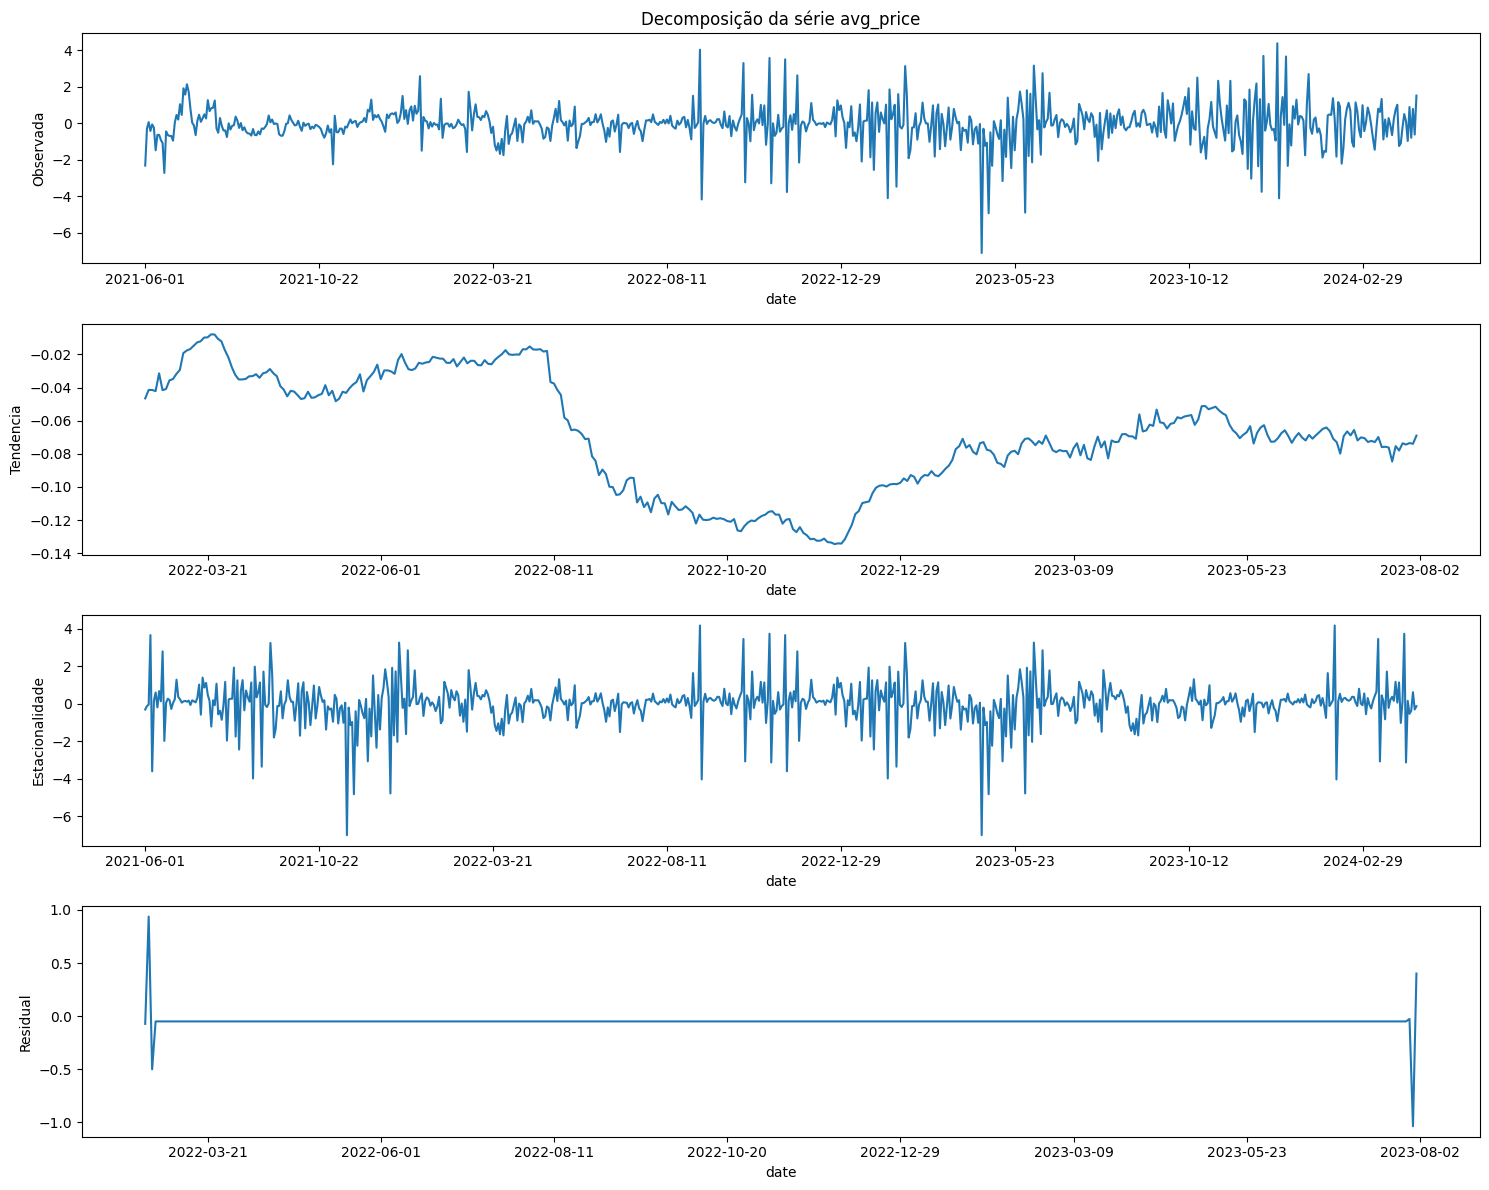

Deconposição: ask


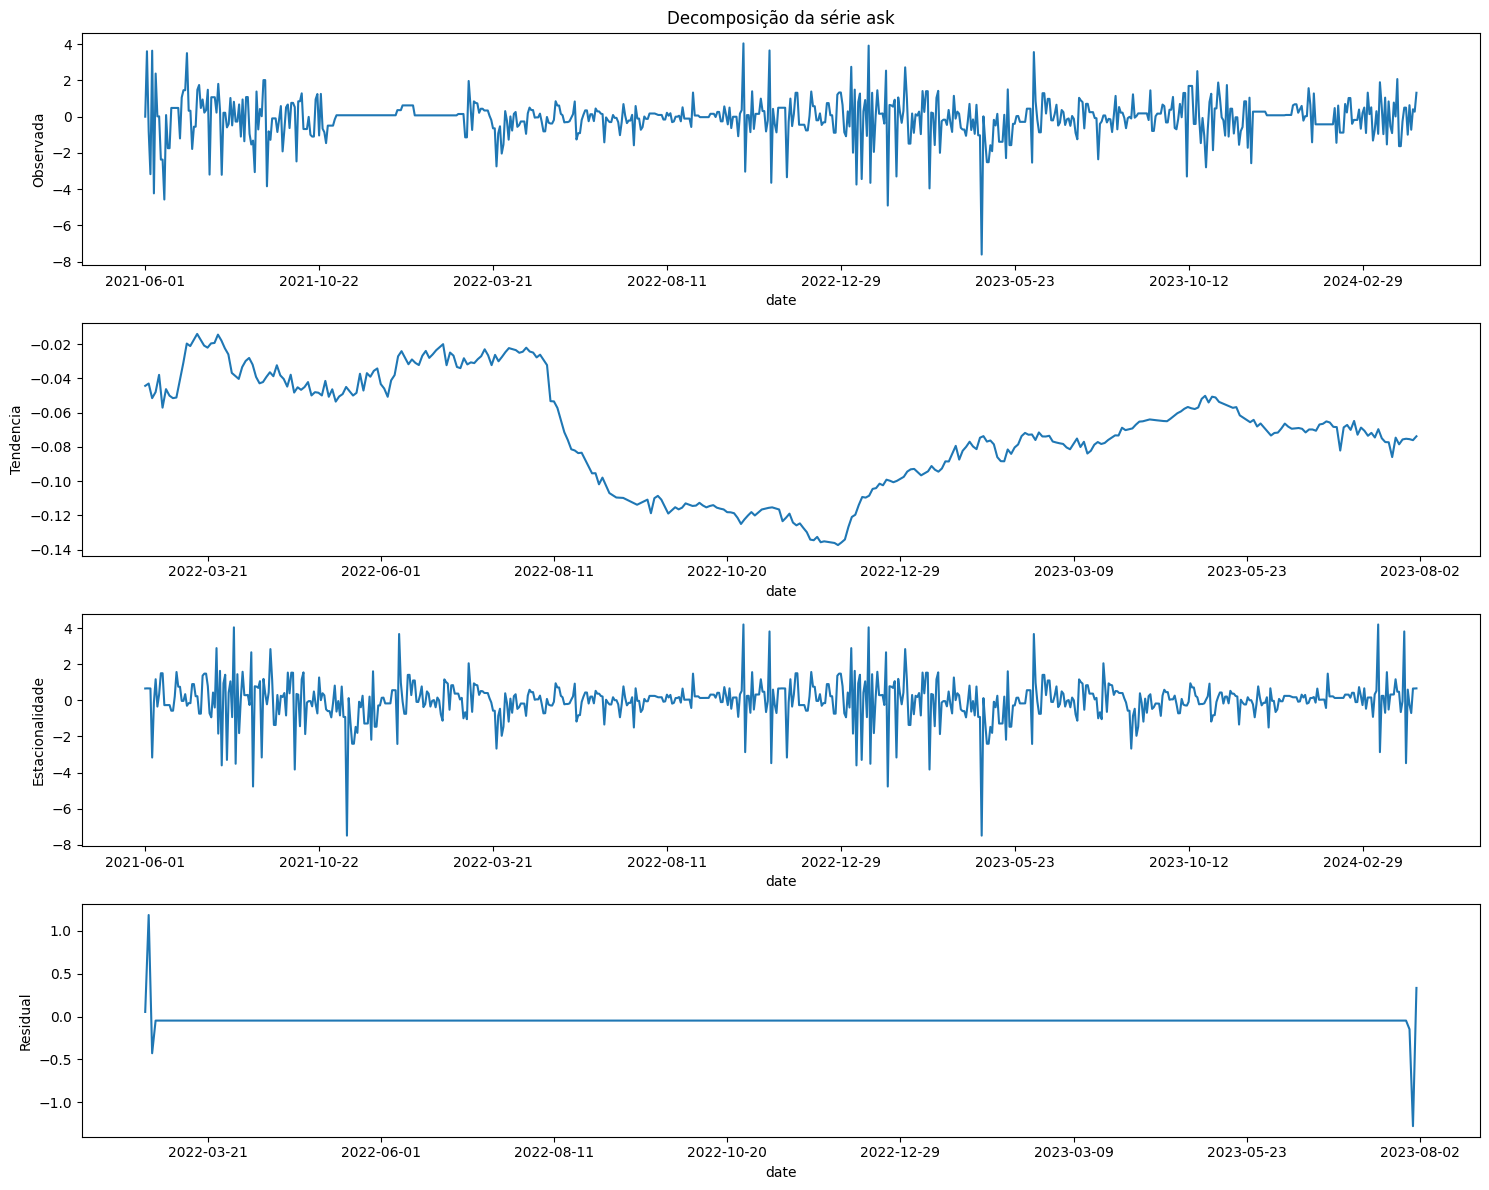

Deconposição: bid


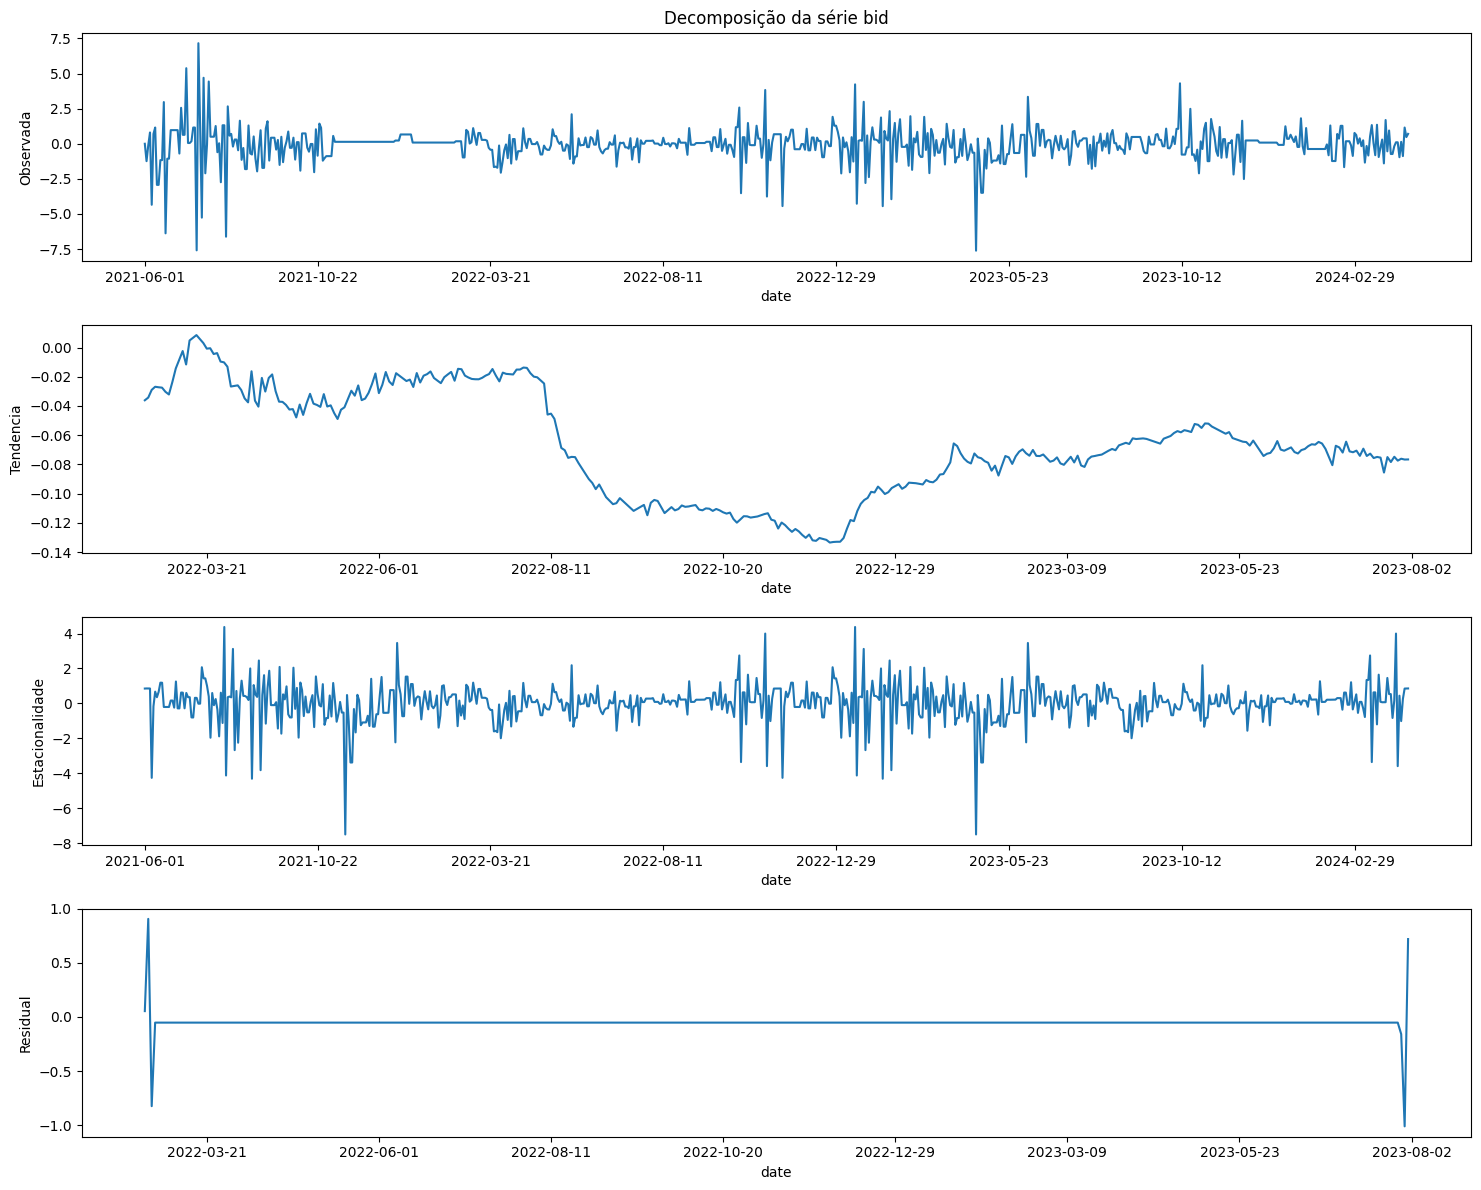

In [58]:
# Aplicando a função de decomposição da série

decompositions = {}
for series_name in df_estacionarias.columns:
    print(f'Deconposição: {series_name}')
    decompositions[series_name] = decompose_series(df_estacionarias[series_name], series_name)


# Análise de Autocorrelação e Autocorrelação parcial

In [59]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Análise: avg_price


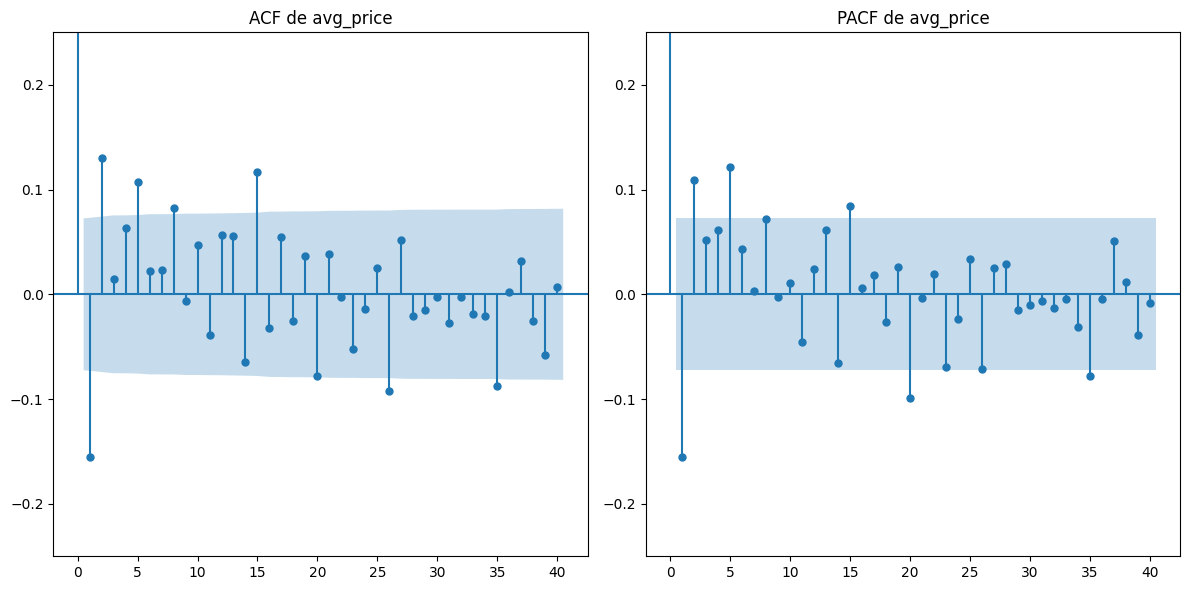

Análise: ask


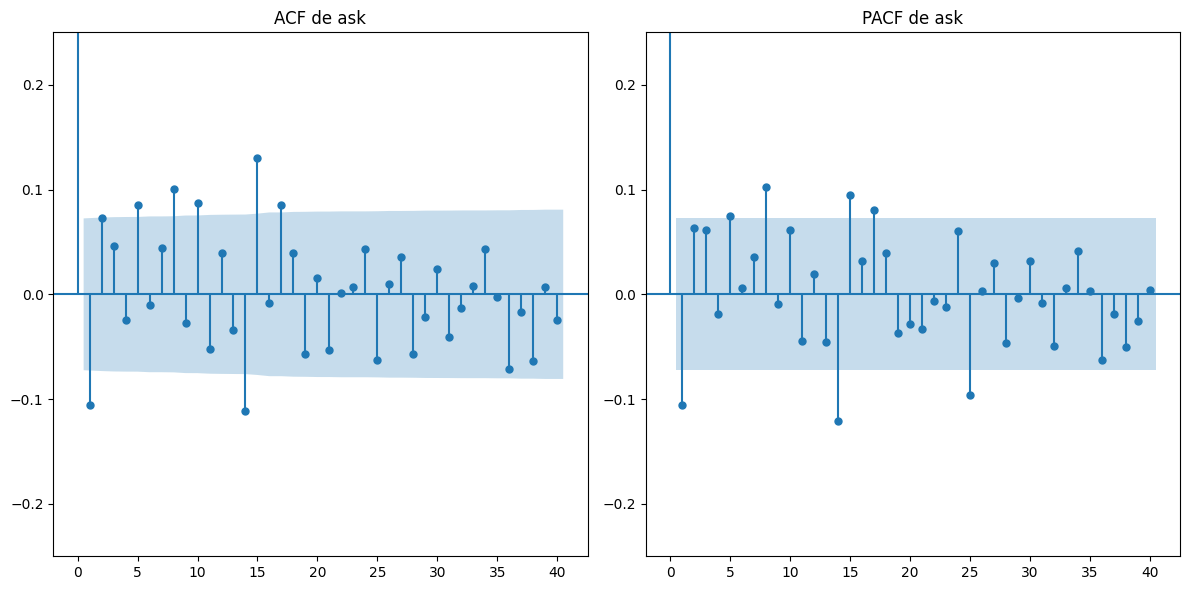

Análise: bid


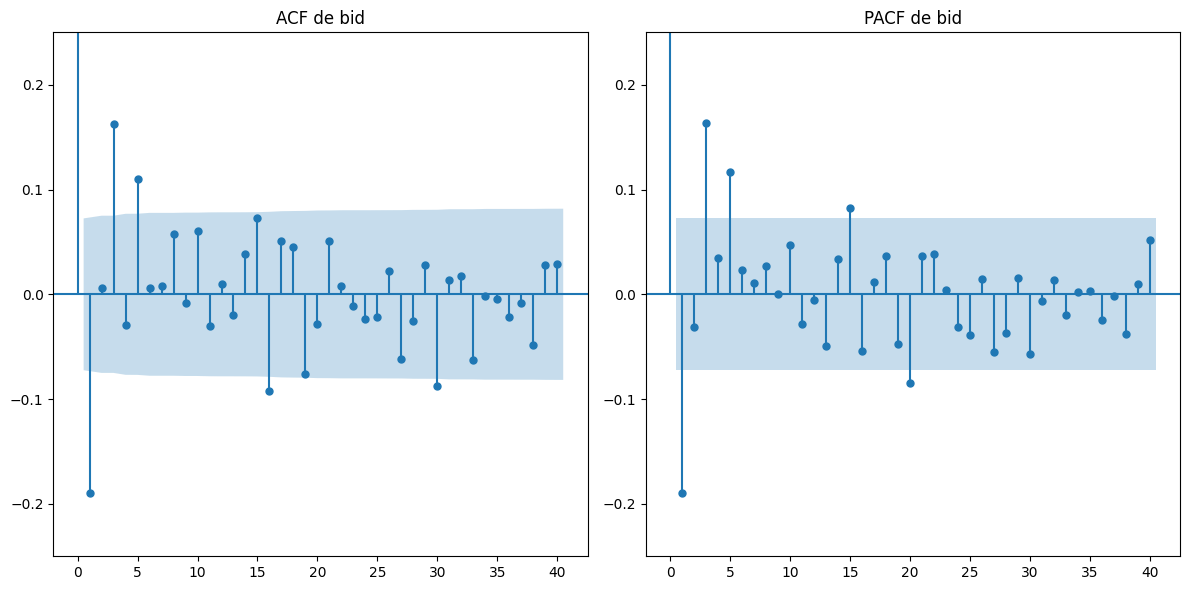

In [60]:
series_to_analyze = df_estacionarias.columns

# ACF e PACF function
def plot_acf_pacf(series, series_name, lags=40):
    plt.figure(figsize=(12, 6))

    # Gráfico de ACF
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.ylim(-0.25, 0.25)
    plt.title(f'ACF de {series_name}')

    # Gráfico de PACF
    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca(), method='ywm')
    plt.ylim(-0.25, 0.25)
    plt.title(f'PACF de {series_name}')


    plt.tight_layout()
    plt.show()

# ACF e PACF para série diferenciada
for series_name in series_to_analyze:
    print(f'Análise: {series_name}')
    series = df_estacionarias[series_name]
    plot_acf_pacf(series, series_name)

# Modelado ARIMA

In [30]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [31]:
df_estacionarias.head()

,avg_price,ask,bid
date,,,
2021-06-01,-2.322839,0.000000,0.000000
2021-06-02,-0.297777,3.608038,-1.239694
2021-06-04,0.057777,-0.805180,-0.101389
2021-06-07,-0.426666,-3.171163,0.803722
2021-06-08,-0.066666,3.639877,-4.345707


## ARIMA

In [61]:
df_avg_price_diff = df_estacionarias['avg_price']

# Identificador de possíveis valores de p e q
p_values = range(0, 4)
q_values = range(0, 4)

# obter melhores valores de p, d, q utilizando AIC
best_aic = np.inf
best_order = None
best_mdl = None

for p in p_values:
    for q in q_values:
        try:
            tmp_mdl = ARIMA(df_avg_price_diff, order=(p, 0, q)).fit()
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (p, 0, q)
                best_mdl = tmp_mdl
        except Exception as e:
            continue

print(f'O melhor modelo de arima é: ARIMA{best_order} con AIC={best_aic}')
print(best_mdl.summary())


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been pro

O melhor modelo de arima é: ARIMA(2, 0, 1) con AIC=2120.849981901209
                               SARIMAX Results                                
Dep. Variable:              avg_price   No. Observations:                  732
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1055.425
Date:                Tue, 29 Oct 2024   AIC                           2120.850
Time:                        22:18:24   BIC                           2143.829
Sample:                             0   HQIC                          2129.714
                                - 732                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0612      0.059     -1.044      0.296      -0.176       0.054
ar.L1          0.6382      0.065      9.782      0.000       0

In [62]:
print(best_order)

(2, 0, 1)


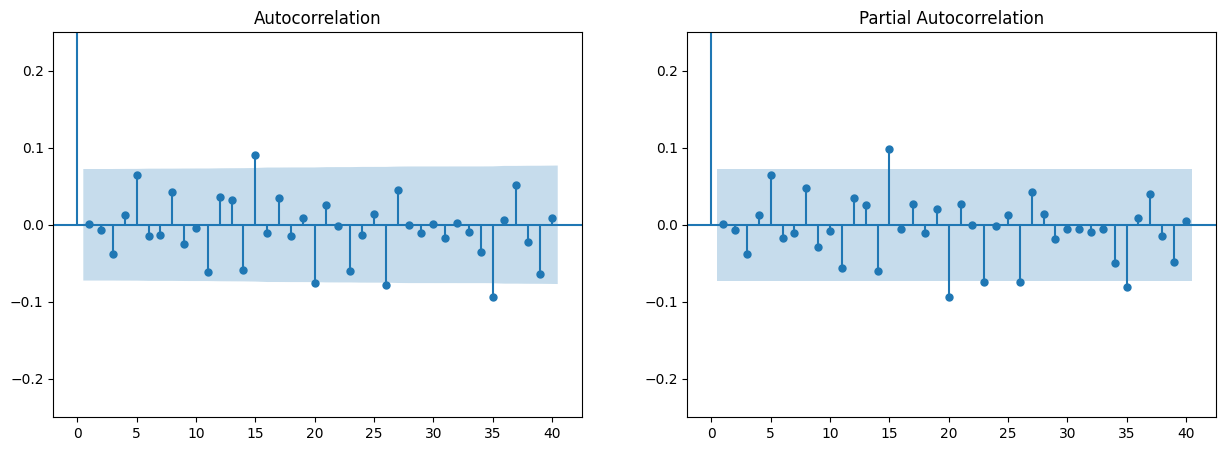

In [63]:
# Diagnóstico de residuos
residuals = best_mdl.resid
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
ax[0].set_ylim(-0.25, 0.25) 
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
ax[1].set_ylim(-0.25, 0.25)  
plt.show()

## Autoarima

In [64]:
!pip install pmdarima

In [35]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2121.990, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2155.495, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2140.353, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2143.883, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2121.444, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2132.939, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2137.008, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2122.788, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2134.720, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2120.013, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2132.961, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2122.000, Time=0.49 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2132.762, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2123.902, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept

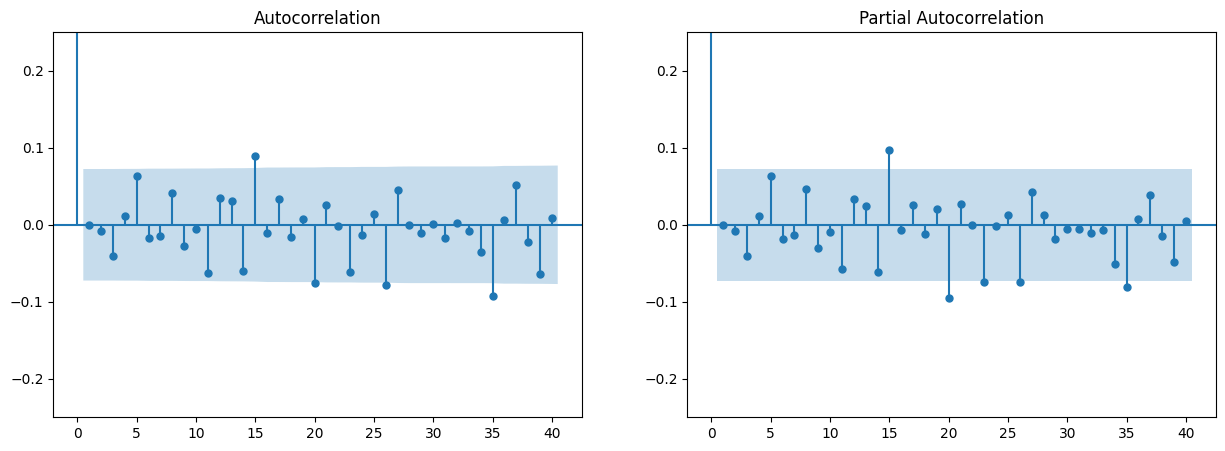

In [65]:
# Selecionar avg_price por diferenciação
df_avg_price_diff = df_estacionarias['avg_price']

# Aplicar AUTOARIMA
model = auto_arima(df_avg_price_diff, seasonal=False, stepwise=True, trace=True)

# resumo do modelo selecionado
print(model.summary())

# Diagnóstico de residuos
residuals = model.resid()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[0])
ax[0].set_ylim(-0.25, 0.25)  # limites de y
fig = sm.graphics.tsa.plot_pacf(residuals, lags=40, ax=ax[1])
ax[1].set_ylim(-0.25, 0.25)  #limites de y
plt.show()

# Modelo ARIMA

In [66]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [67]:
# df serie orginal
df.head()

,product_id,main_location_id,id,avg_price,ask,bid,created_at,main_location,updated_at
date,,,,,,,,,
2021-05-31,2,13,1267,100.582839,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-01,2,13,1,98.260000,100.930014,96.294925,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-02,2,13,367,97.962223,104.538052,95.055231,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-04,2,13,1242,98.019999,103.732872,94.953842,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02
2021-06-07,2,13,425,97.593333,100.561709,95.757563,2021-08-02 14:51:46,NaN,2023-08-29 19:11:02


In [68]:
df_avg_price_diff = df_estacionarias['avg_price']

# Divisão treinamento e teste
train_size = int(len(df_avg_price_diff) * 0.7)
train, test = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]

model = ARIMA(train, order=best_order) # tupla com os melhores valores (2, 0, 1)
model_fit = model.fit()

# Predição no conjunto de prova
start = len(train)
end = len(train) + len(test) - 1
predictions_diff = model_fit.predict(start=start, end=end, dynamic=True)

# série original
df_avg_price_original = df['avg_price']

# Série vazia para previsões invertidas
predictions = pd.Series(index=test.index, dtype=float)

# Reverter a diferenciação  utilizando os valores da serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df_avg_price_original.iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

In [69]:
# MSE teste
mse = mean_squared_error(df_avg_price_original[test.index], predictions)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 336.46617205084726


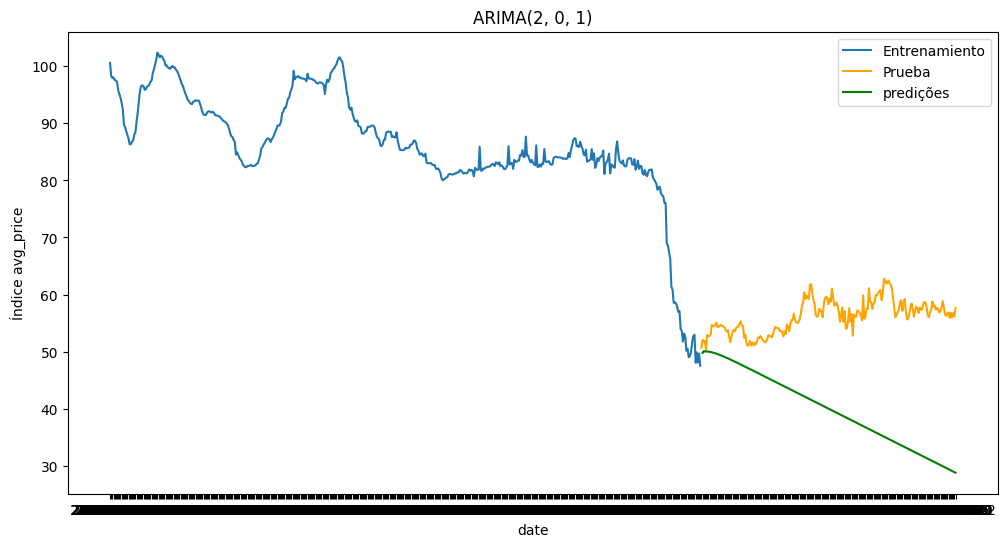

In [71]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_avg_price_original.index[:train_size], df_avg_price_original[:train_size], label='Entrenamiento')
plt.plot(df_avg_price_original.index[train_size:], df_avg_price_original[train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='predições', color='green')
plt.xlabel('date')
plt.ylabel('Índice avg_price')
plt.title(f'ARIMA{best_order}')
plt.legend()
plt.show()

## SARIMAX

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [73]:
df_estacionarias.columns

Index(['avg_price', 'ask', 'bid'], dtype='object')

In [74]:
df.columns

Index(['product_id', 'main_location_id', 'id', 'avg_price', 'ask', 'bid',
       'created_at', 'main_location', 'updated_at'],
      dtype='object')

In [76]:
# df de avg_price diferenciada
df_avg_price_diff = df_estacionarias['avg_price']

# variáveis exógenas
exogenous_vars = ['ask','bid']

# dados de teste e treinamento
train_size = int(len(df_avg_price_diff) * 0.7)
train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

combinations_of_vars = [combo for combo in combinations(exogenous_vars, 2)]
print("Combinations of exogenous variables:", combinations_of_vars)
# Evaluar combinaciones de variables exógenas utilizando AIC
best_aic = np.inf
best_order = None
best_model = None
best_vars = None
for combo in combinations_of_vars:
    try:
        print("Entrou aqui?", combo)
        model = SARIMAX(endog=train_diff, order=(2, 0, 0), exog=train_exog)
        print("1")
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        print("AIC:", aic)  
        if aic < best_aic:
            best_aic = aic
            best_order = (2, 0, 0)
            best_model = model_fit
            best_vars = combo
    except Exception as e:
        continue

print(f'O melhor modelo SARIMAX encontrado é: SARIMAX{best_order} con AIC={best_aic} y variables exógenas: {best_vars}')
print(best_model)
# print(best_model.summary())

Combinations of exogenous variables: [('ask', 'bid')]
Entrou aqui? ('ask', 'bid')
1


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AIC: 1070.89643594356
O melhor modelo SARIMAX encontrado é: SARIMAX(2, 0, 0) con AIC=1070.89643594356 y variables exógenas: ('ask', 'bid')


In [46]:
train_exog.head()

,ask,bid
date,,
2021-06-01,0.000000,0.000000
2021-06-02,3.608038,-1.239694
2021-06-04,-0.805180,-0.101389
2021-06-07,-3.171163,0.803722
2021-06-08,3.639877,-4.345707


In [47]:
train_diff.head()

date
2021-06-01   -2.322839
2021-06-02   -0.297777
2021-06-04    0.057777
2021-06-07   -0.426666
2021-06-08   -0.066666
Name: avg_price, dtype: float64

In [48]:
# Realizar predicciones en el conjunto de prueba
predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# Invertir la diferenciación para obtener las predicciones en el contexto original
# Crear una serie vacía para las predicciones invertidas
predictions = pd.Series(index=test_diff.index, dtype=float)

# Revertir la diferenciación utilizando los valores de la serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df['avg_price'].iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# Evaluar el desempeño del modelo
mse = mean_squared_error(df['avg_price'][test_diff.index], predictions)
print(f'Error cuadrático medio (MSE): {mse}')


Error cuadrático medio (MSE): 2.849647860913733


c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gui_h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


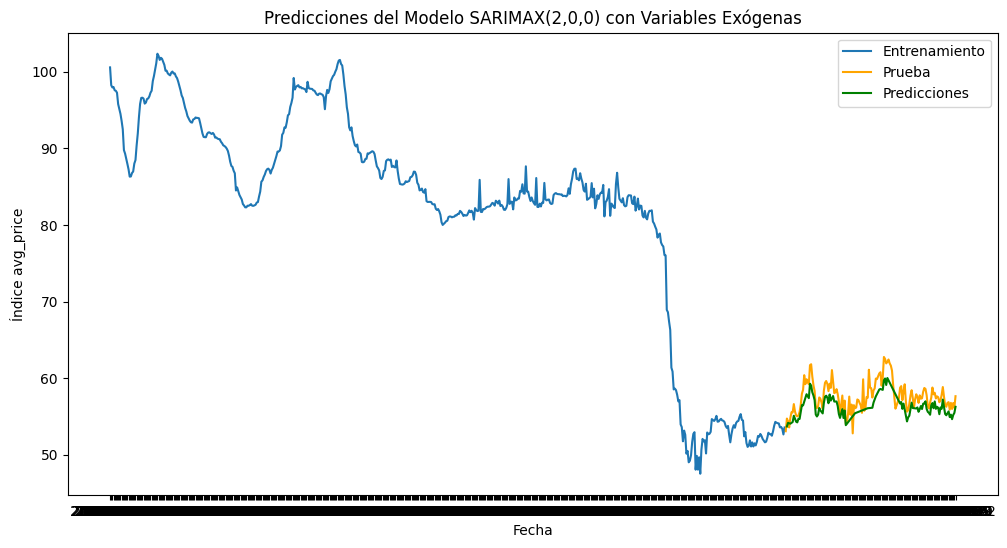

In [49]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['avg_price'].index[:train_size], df['avg_price'][:train_size], label='Entrenamiento')
plt.plot(df['avg_price'].index[train_size:], df['avg_price'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice avg_price')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con Variables Exógenas')
plt.legend()
plt.show()

In [50]:
# El mismo gráfico pero solo en el período de predicción

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['COLCAP'].index[train_size:], df['COLCAP'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con Variables Exógenas')
plt.legend()
plt.show()

KeyError: 'COLCAP'

<Figure size 1200x600 with 0 Axes>

### Enfoque con factor estacional

In [ ]:
# Seleccionar la serie COLCAP ya diferenciada
df_avg_price_diff = df_estacionarias['COLCAP']

# Definir las variables exógenas a considerar
exogenous_vars = ['EMBI', 'DOLAR', 'CIB', 'FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG', 'ILF']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(df_avg_price_diff) * 0.8)
train_diff, test_diff = df_avg_price_diff[:train_size], df_avg_price_diff[train_size:]
train_exog, test_exog = df_estacionarias[exogenous_vars][:train_size], df_estacionarias[exogenous_vars][train_size:]

# Combinaciones de al menos 4 variables exógenas
# combinations_of_vars = [combo for combo in combinations(exogenous_vars, 4)]

# Evaluar combinaciones de variables exógenas y componentes estacionales utilizando AIC
best_aic = np.inf
best_order = None
best_seasonal_order = None
best_model = None
best_vars = None

# Parámetros estacionales
seasonal_p = range(0, 2)
seasonal_d = [0, 1]
seasonal_q = range(0, 2)
seasonal_s = [5, 7]

for sp in seasonal_p:
  for sd in seasonal_d:
    for sq in seasonal_q:
      for ss in seasonal_s:

        model = SARIMAX(train_diff, order=(2, 0, 0), seasonal_order=(sp, sd, sq, ss), exog=train_exog[['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']])
        model_fit = model.fit(disp=False)
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (2, 0, 0)
            best_seasonal_order = (sp, sd, sq, ss)
            best_model = model_fit
            best_vars = ['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']


print(f'El mejor modelo SARIMAX encontrado es: SARIMAX{best_order} con orden estacional {best_seasonal_order}, AIC={best_aic} y variables exógenas: {best_vars}')
print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

El mejor modelo SARIMAX encontrado es: SARIMAX(2, 0, 0) con orden estacional (0, 0, 0, 5), AIC=18310.239253510143 y variables exógenas: ['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']
                               SARIMAX Results                                
Dep. Variable:                 COLCAP   No. Observations:                 3176
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -9148.120
Date:                Mon, 01 Jul 2024   AIC                          18310.239
Time:                        22:28:10   BIC                          18352.683
Sample:                    02-11-2009   HQIC                         18325.462
                         - 04-14-2021                                         
Covariance Type:                  opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
FTSE COLOMBIA     0.2683   

In [ ]:
# Realizar predicciones en el conjunto de prueba
predictions_diff = best_model.predict(start=len(train_diff), end=len(train_diff) + len(test_diff) - 1, exog=test_exog[list(best_vars)])

# Invertir la diferenciación para obtener las predicciones en el contexto original
# Crear una serie vacía para las predicciones invertidas
predictions = pd.Series(index=test_diff.index, dtype=float)

# Revertir la diferenciación utilizando los valores de la serie original
for i in range(len(predictions_diff)):
    if i == 0:
        predictions.iloc[i] = df['COLCAP'].iloc[train_size] + predictions_diff.iloc[i]
    else:
        predictions.iloc[i] = predictions.iloc[i - 1] + predictions_diff.iloc[i]

# Evaluar el desempeño del modelo
mse = mean_squared_error(df['COLCAP'][test_diff.index], predictions)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 4229.376568163738


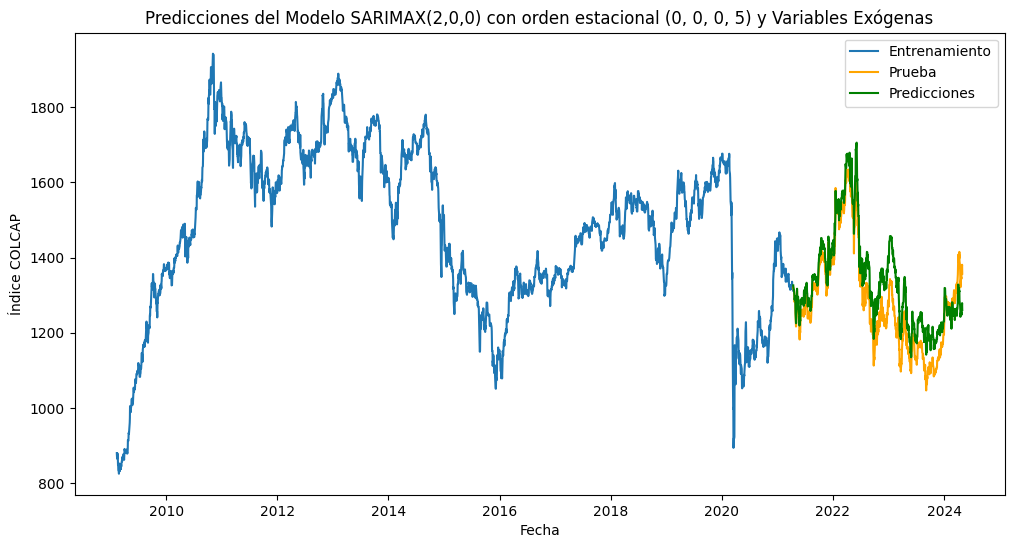

In [ ]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['COLCAP'].index[:train_size], df['COLCAP'][:train_size], label='Entrenamiento')
plt.plot(df['COLCAP'].index[train_size:], df['COLCAP'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con orden estacional (0, 0, 0, 5) y Variables Exógenas')
plt.legend()
plt.show()

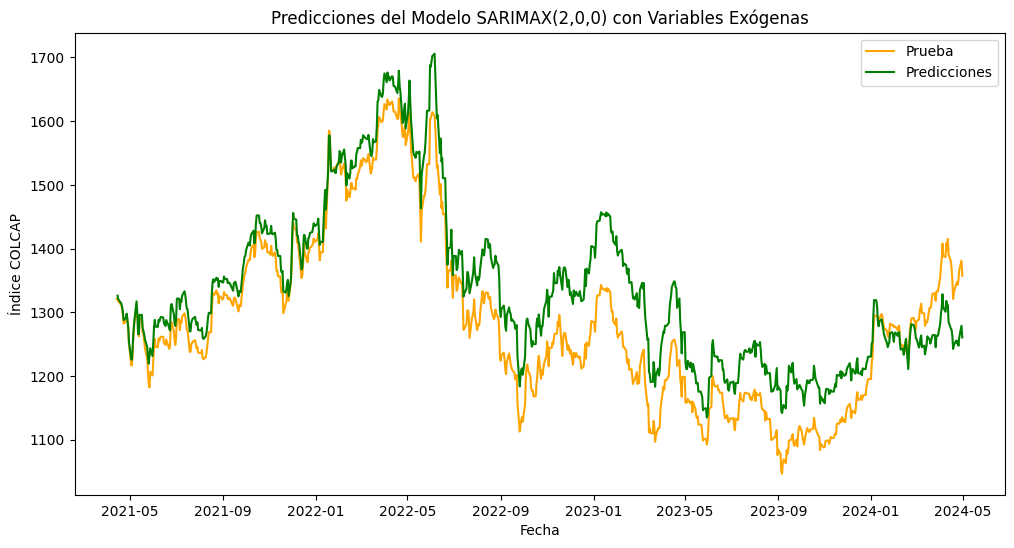

In [ ]:
# El mismo gráfico pero solo en el período de predicción

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['COLCAP'].index[train_size:], df['COLCAP'][train_size:], label='Prueba', color='orange')
plt.plot(predictions.index, predictions, label='Predicciones', color='green')
plt.xlabel('Fecha')
plt.ylabel('Índice COLCAP')
plt.title('Predicciones del Modelo SARIMAX(2,0,0) con Variables Exógenas')
plt.legend()
plt.show()

# Redes Neuronales Recurrentes (RNN)

## LSTM

### Construcción del modelo LSTM

In [ ]:
datos = df[['COLCAP', 'FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']]
datos.head()

,COLCAP,FTSE COLOMBIA,EMM,BRENT,GXG
FECHA,,,,,
2009-02-10,879.72,2452.51,23.17,44.61,30.00
2009-02-11,874.27,2438.27,23.87,44.28,30.00
2009-02-12,865.27,2404.89,23.72,44.65,30.00
2009-02-13,879.41,2452.28,23.84,44.81,30.48
2009-02-16,878.55,2443.00,23.84,43.28,30.48


In [ ]:
# Split data
size = int(len(datos)*0.8)
X_train, X_test = datos.iloc[:size], datos.iloc[size:]

In [ ]:
# Datos de entrenamiento
y_train = X_train['COLCAP'][1:].values
exog_train = X_train[['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']][1:].values

In [ ]:
import datetime

# Datos de prueba
start_date = datetime.datetime.strftime(datos.iloc[len(X_train)].name, '%Y-%m-%d')
end_date = datetime.datetime.strftime(datos.iloc[-1].name, '%Y-%m-%d')
y_test = X_test['COLCAP'][start_date:end_date].values
exog_test = X_test[['FTSE COLOMBIA', 'EMM', 'BRENT', 'GXG']][start_date:end_date].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar los datos
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [ ]:
scaler_exog = MinMaxScaler(feature_range=(0, 1))
exog_train_scaled = scaler_exog.fit_transform(exog_train)
exog_test_scaled = scaler_exog.transform(exog_test)

In [ ]:
# Combinar y_train_scaled y exog_train_scaled
train_data = np.hstack((y_train_scaled, exog_train_scaled))
test_data = np.hstack((y_test_scaled, exog_test_scaled))

In [ ]:
# Crear una función para crear secuencias de datos
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # La primera columna es la variable dependiente
    return np.array(X), np.array(y)

In [ ]:
seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
history

Epoch 1/50
78/78 [==============================] - 19s 111ms/step - loss: 0.0219 - val_loss: 0.0039
Epoch 2/50
78/78 [==============================] - 5s 60ms/step - loss: 0.0050 - val_loss: 0.0029
Epoch 3/50
78/78 [==============================] - 5s 68ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 4/50
78/78 [==============================] - 5s 70ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 5/50
78/78 [==============================] - 5s 59ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 6/50
78/78 [==============================] - 6s 80ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 7/50
78/78 [==============================] - 5s 60ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 8/50
78/78 [==============================] - 5s 59ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 9/50
78/78 [==============================] - 6s 82ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 10/50
78/78 [==============================] - 5s 59ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Hacer predicciones
predictions_scaled = model.predict(X_test)

# Desnormalizar las predicciones
predictions = scaler_y.inverse_transform(predictions_scaled)

# Desnormalizar los valores reales de y_test
y_test_descaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Crear un DataFrame para visualizar las predicciones y los valores reales
df_results = pd.DataFrame({
    'Real': y_test_descaled.flatten(),
    'Predicted': predictions.flatten()
})

df_results

23/23 [==============================] - 1s 16ms/step


,Real,Predicted
0,1286.43,1275.376099
1,1284.04,1280.499756
2,1293.02,1283.617432
3,1298.44,1286.687012
4,1293.76,1290.556519
...,...,...
730,1343.34,1318.579346
731,1349.93,1318.756470
732,1366.61,1319.971680
733,1381.01,1324.838379


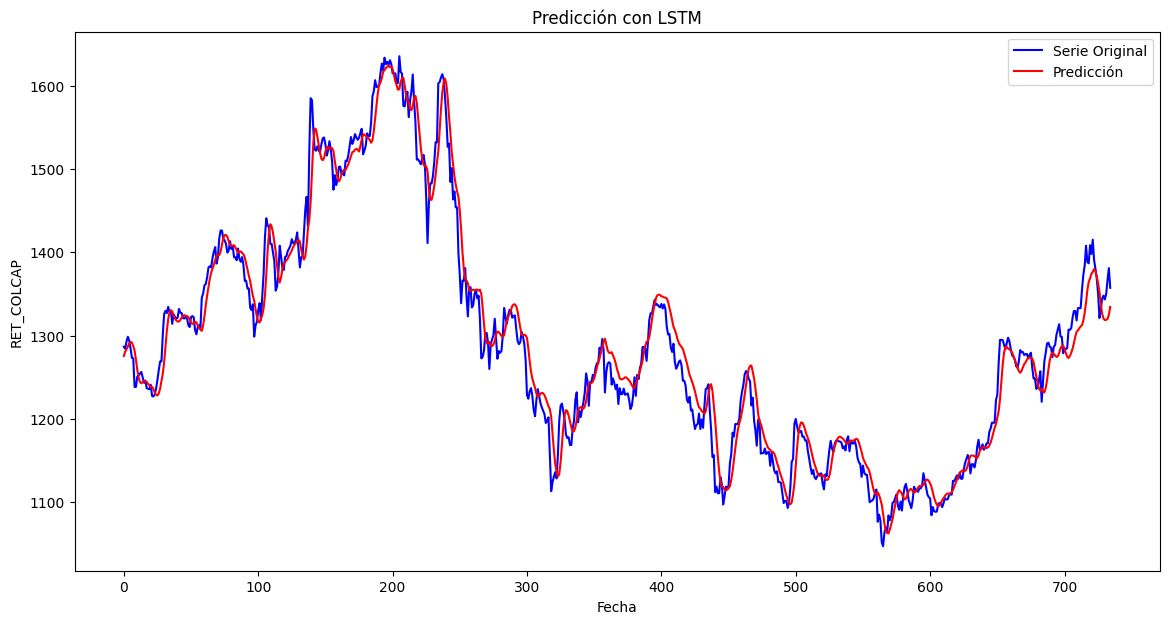

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y un eje
plt.figure(figsize=(14, 7))

# Graficar la serie original
plt.plot(df_results.index, df_results['Real'], label='Serie Original', color='blue')

# Graficar la predicción
plt.plot(df_results.index, df_results['Predicted'], label='Predicción', color='red')

# Añadir título y etiquetas de los ejes
plt.title('Predicción con LSTM')
plt.xlabel('Fecha')
plt.ylabel('RET_COLCAP')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_descaled, predictions)
mae = mean_absolute_error(y_test_descaled, predictions)
mape = np.mean(np.abs((y_test_descaled - predictions) / y_test_descaled)) * 100

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Porcentual Absoluto Medio (MAPE): {mape:.2f}%')


Error Cuadrático Medio (MSE): 653.7703518069624
Error Absoluto Medio (MAE): 18.89894550515518
Error Porcentual Absoluto Medio (MAPE): 1.47%


In [ ]:
def descaler(scaled_data, scaler, original_shape):
    scaled_data_reshaped = scaled_data.reshape(-1, 1)
    descaled_data = scaler.inverse_transform(np.concatenate((scaled_data_reshaped, np.zeros((scaled_data_reshaped.shape[0], original_shape - 1))), axis=1))
    return descaled_data[:, 0]

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento
train_predictions = model.predict(X_train)

# Desescalar las predicciones del conjunto de entrenamiento
train_predictions_descaled = descaler(train_predictions, scaler_y, len(series))

# Desescalar los valores reales del conjunto de entrenamiento
y_train_descaled = descaler(y_train, scaler_y, len(series))

# Calcular MSE, MAE y MAPE para el conjunto de entrenamiento
train_mse = mean_squared_error(y_train_descaled, train_predictions_descaled)
train_mae = mean_absolute_error(y_train_descaled, train_predictions_descaled)
train_mape = np.mean(np.abs((y_train_descaled - train_predictions_descaled) / y_train_descaled)) * 100

print(f'Error Cuadrático Medio (MSE) en Entrenamiento: {train_mse}')
print(f'Error Absoluto Medio (MAE) en Entrenamiento: {train_mae}')
print(f'Error Porcentual Absoluto Medio (MAPE) en Entrenamiento: {train_mape:.2f}%')

98/98 [==============================] - 3s 33ms/step
Error Cuadrático Medio (MSE) en Entrenamiento: 566.4881870656754
Error Absoluto Medio (MAE) en Entrenamiento: 15.637790785666255
Error Porcentual Absoluto Medio (MAPE) en Entrenamiento: 1.09%
